Logistic Regression is a statistical method used for binary classification, which means it is employed when the dependent variable is categorical and has two classes or outcomes. It is a type of regression analysis that models the probability of an event occurring as a function of one or more predictor (independent) variables.

Unlike linear regression, which predicts a continuous outcome, logistic regression predicts the probability that an instance belongs to a particular category. The output of logistic regression is transformed using the logistic function (also known as the sigmoid function), which ensures that the predicted values are between 0 and 1. The logistic function allows us to interpret the output as probabilities.

In mathematical terms, the logistic regression model can be represented as:

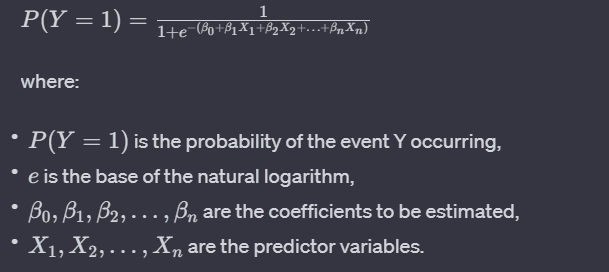

The logistic regression model is trained using a method called maximum likelihood estimation, and the coefficients are adjusted to maximize the likelihood of observing the given data.

Logistic regression is widely used in various fields, including machine learning, epidemiology, economics, and social sciences, when the outcome of interest is binary or dichotomous.

In [212]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import learning_curve

In [213]:
# Veriyi oku
df = pd.read_csv("pricerunner_aggregate.csv")

In [214]:
# Veri setinin özelliklerini görüntüleyin
print(df.columns)

Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label'],
      dtype='object')


In [215]:
# Veri setinin boyutunu görüntüleyin
print(df.shape)

(35311, 7)


In [216]:
# Veri setinin öznitelik özetlerini görüntüleyin
print(df.describe())

         Product ID   Merchant ID    Cluster ID   Category ID
count  35311.000000  35311.000000  35311.000000  35311.000000
mean   26150.800176    120.501883  30110.687633   2618.142930
std    13498.191220    117.045557  18410.265642      3.600708
min        1.000000      1.000000      1.000000   2612.000000
25%    14958.500000     17.000000   6123.000000   2615.000000
50%    27614.000000     75.000000  40630.000000   2619.000000
75%    37508.500000    253.000000  44059.000000   2622.000000
max    47358.000000    371.000000  47525.000000   2623.000000


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [218]:
# Veri setinin eksik değerlerini kontrol edin
print(df.isnull().sum())

Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64


In [219]:
# Veri setinin kategorik özelliklerini görüntüleyin
print(df.dtypes)

Product ID          int64
Product Title      object
 Merchant ID        int64
 Cluster ID         int64
 Cluster Label     object
 Category ID        int64
 Category Label    object
dtype: object


In [220]:
# Veri setinin kategorik özelliklerinin dağılımını görüntüleyin
for col in df.select_dtypes(include=object):
    print(df[col].value_counts())

Product Title
washing machine                                                     90
built in fully integrated dishwasher                                35
frost free fridge freezer                                           34
washer dryer                                                        24
american fridge freezer                                             22
                                                                    ..
cyber shot rx10 ii                                                   1
sony dsc rx10 ii 20.2 mp 8.3x zoom bridge camera black               1
sony dsc rx10 ii                                                     1
sony cyber shot dsc rx10 ii high performance bridge camera black     1
neff k4316x7gb built under larder fridge                             1
Name: count, Length: 30993, dtype: int64
 Cluster Label
Canon IXUS 185              27
Canon PowerShot SX730 HS    24
Samsung UE49NU7100          24
Apple iPhone 8 Plus 64GB    23
Samsung UE65NU7100       

In [221]:
print(df.columns)


Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label'],
      dtype='object')


In [222]:
"""encoder=LabelEncoder()
categorical_features = ["Product Title"," Cluster Label", " Category Label"]
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])
    selected_columns = ['Product Title', ' Category Label',' Category ID']
newDF = df[selected_columns]
    """

'encoder=LabelEncoder()\ncategorical_features = ["Product Title"," Cluster Label", " Category Label"]\nfor feature in categorical_features:\n    df[feature] = encoder.fit_transform(df[feature])\n    selected_columns = [\'Product Title\', \' Category Label\',\' Category ID\']\nnewDF = df[selected_columns]\n    '

In [223]:
selected_columns = ['Product Title', ' Category Label']
newDF = df[selected_columns]
vectorizer = CountVectorizer()



In [224]:

# "Category Label" sütununu hedef değişken olarak seç
y = newDF[" Category Label"]
X_title = vectorizer.fit_transform(newDF['Product Title'])
#x = newDF.drop(" Category Label", axis=1)
# Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(
    X_title,
    y,
    test_size=0.2,
    random_state=42
)

# Lojistik regresyon modelini oluştur ve eğit
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

accuracy: 0.9558261362027467
precision: 0.9566458877102958
recall: 0.9558261362027467
F1 : 0.9558885437473602


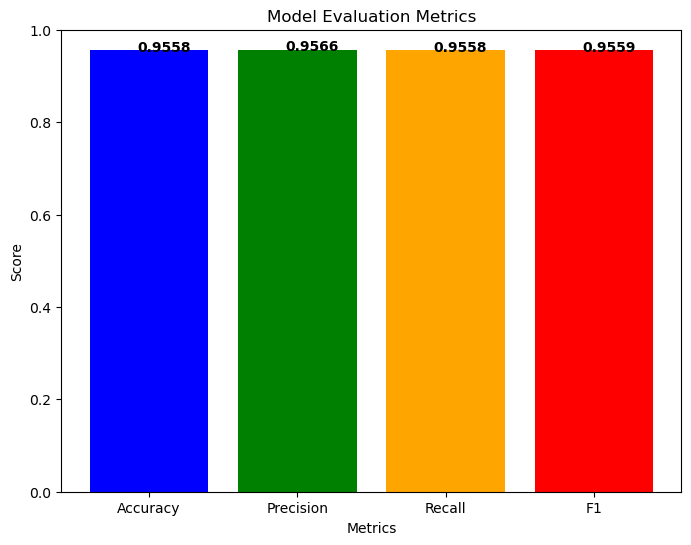

In [225]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted',zero_division=1)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("F1 :", f1)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Display values on top of bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 + 0.1, bar.get_height() - 0.002, round(value, 4), ha='center', color='black', fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Setting y-axis limit between 0 and 1 for better visualization
plt.show()

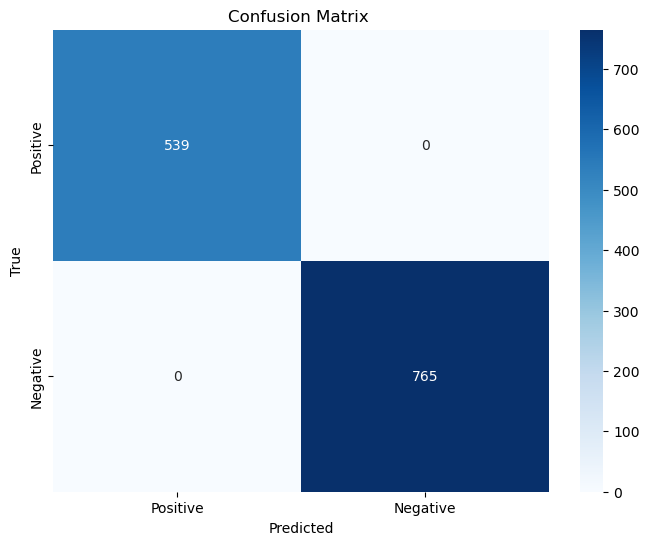

In [226]:
cm = confusion_matrix(y_test, y_pred)

# Calculate TP, FP, FN, TN
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap([[TP, FP], [FN, TN]], annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

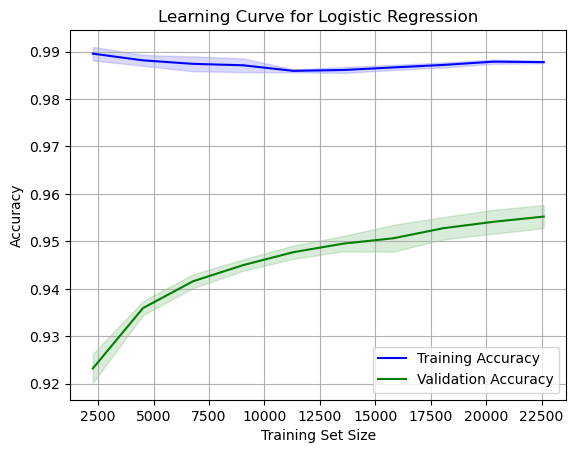

In [227]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Ortalamaları ve standart sapmaları hesapla
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Eğitim kümesi için öğrenme eğrisi
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

# Test kümesi için öğrenme eğrisi
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()